# Energetic analysis and plots - Cabbeling experiment

I have computed the volume integrated background 

$$
\frac{\mathrm{d}E_{b}}{\mathrm{d}t} = \int_{V}g \rho z_{*} \mathrm{d}V
$$

where $z_{*}$ is the adiabatically sorted height as a function of density, the volume integrated potential energy

$$
\frac{\mathrm{d}E_{b}}{\mathrm{d}t} = \int_{V}g \rho z \mathrm{d}V
$$

and the volume integrated buoyancy flux between $z \in [-0.75, -0.25]$

$$
\int_{V} w \rho \mathrm{d}V.
$$

From these quantities I can get the available potential energy $$E_{p} - E_{a}$$ and the reversible buoyancy flux

$$
\int_{V} g\rho w \mathrm{d}V.
$$

In [7]:
cd("/g/data/e14/jb2381/CabbelingExperiments")
using Pkg
Pkg.activate(".")

In [10]:
using NCDatasets, CairoMakie

[ Info: Precompiling NCDatasets [85f8d34a-cbdd-5861-8df4-14fed0d494ab]
[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]


In [41]:
#cd("outputs_equaldiffusion/cabbeling_stepchange_nothing_600min/")
energetics = "energy_diagnostics.nc"
ds = NCDataset(energetics)
t = ds[:time][:] ./ 60
Eb = ds[:∫Eb][:]
Ep = ds[:∫Ep][:]
ρw = ds[:ρw][:]
ϵ = ds[:∫ϵ][:]
close(ds)

closed Dataset

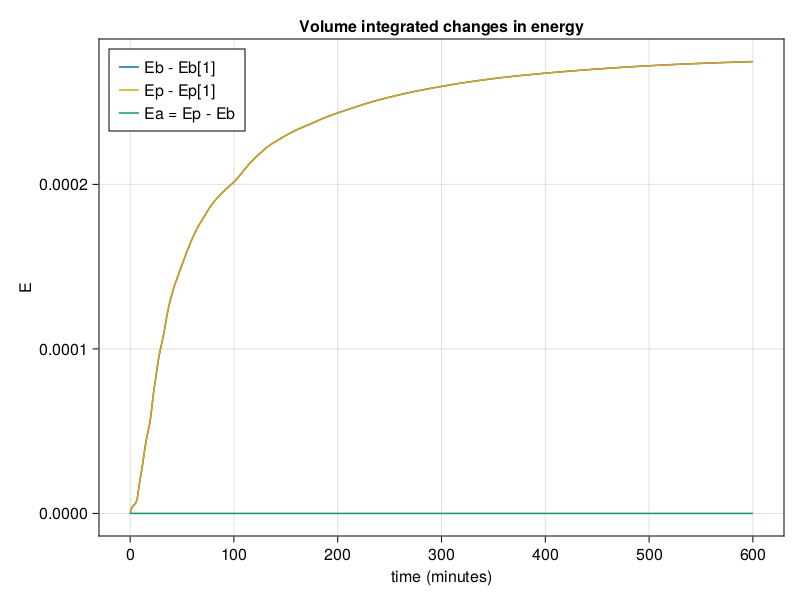

In [42]:
fig = Figure(size = (500, 500))
ax = Axis(fig[1, 1],
          title = "Volume integrated changes in energy",
          xlabel = "time (minutes)", ylabel = "E")
lines!(ax, t, Eb .- Eb[1], label = "Eb - Eb[1]")
lines!(ax, t, Ep .- Ep[1], label = "Ep - Ep[1]")
lines!(ax, t, Ep .- Eb, label = "Ea = Ep - Eb")
axislegend(ax, position = :lt)
fig

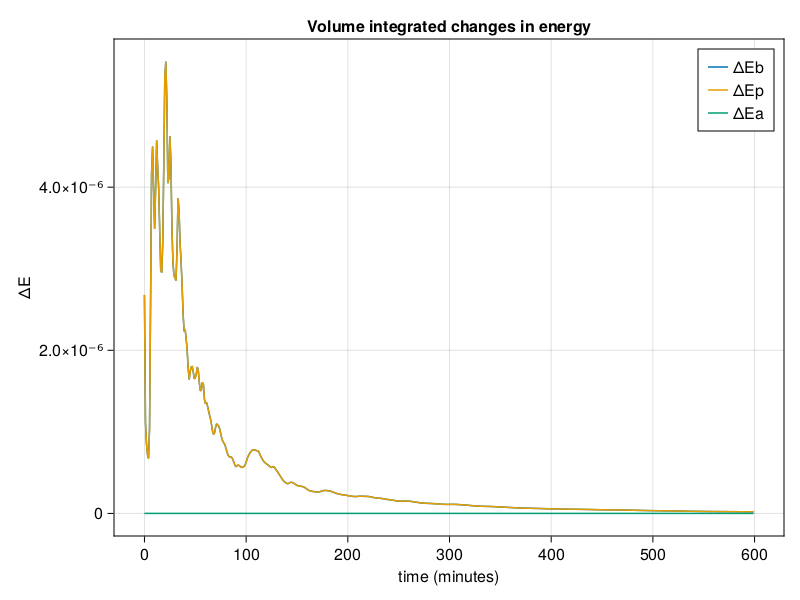

In [43]:
ΔEb = diff(Eb)
ΔEp = diff(Ep)
ΔEa = ΔEp .- ΔEb
fig = Figure(size = (500, 500))
ax = Axis(fig[1, 1],
          title = "Volume integrated changes in energy",
          xlabel = "time (minutes)", ylabel = "ΔE")
lines!(ax, t[1:end-1], ΔEb, label = "ΔEb")
lines!(ax, t[1:end-1], ΔEp, label = "ΔEp")
lines!(ax, t[1:end-1], ΔEa, label = "ΔEa")
axislegend(ax, position = :rt)
fig

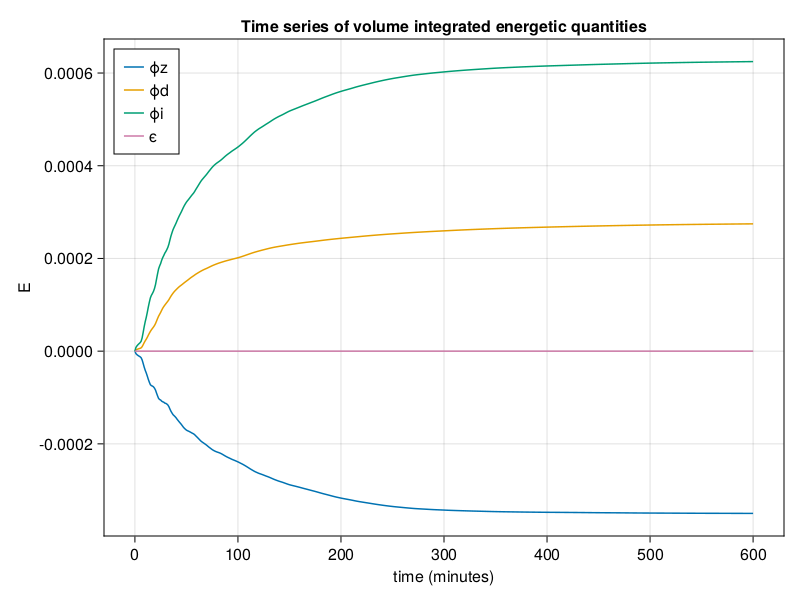

In [44]:
g = -9.81
ϕz = g .* ρw
ϕi = Ep .- ϕz
fig = Figure(size = (500, 500))
ax = Axis(fig[1, 1],
          title = "Time series of volume integrated energetic quantities",
          xlabel = "time (minutes)", ylabel = "E")
lines!(ax, t, ϕz, label = "ϕz")
lines!(ax, t, Eb .- Eb[1], label = "ϕd")
lines!(ax, t, ϕi .- ϕi[1], label = "ϕi")
lines!(ax, t, ϵ, label = "ϵ")
axislegend(ax, position = :lt)
fig

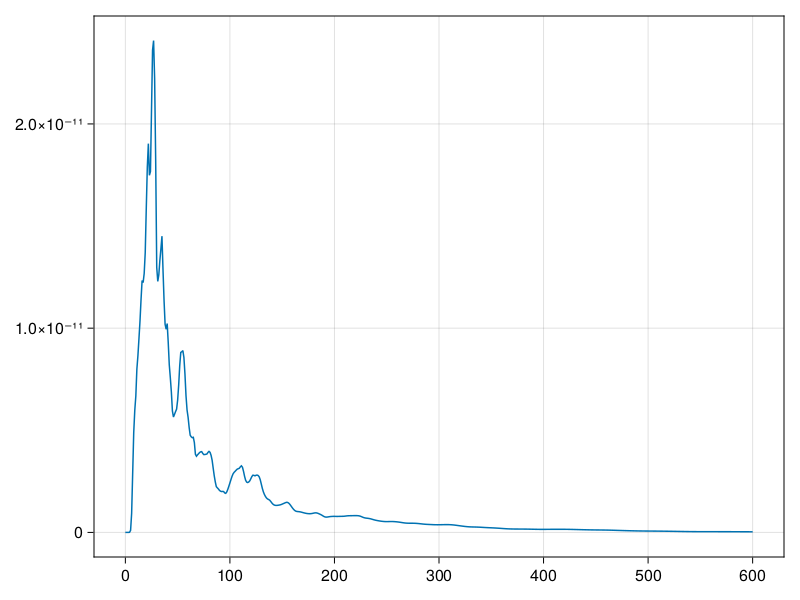

In [45]:
lines(t, ϵ)

In [50]:
mixing_efficiency = Eb ./ ϵ

601-element Vector{Float64}:
 Inf
  1.5118627906525358e19
  2.1378709651183306e18
  1.5352333355619187e17
  8.851340958861833e15
  4.983002167556813e14
  5.397576000897007e13
  1.7314012051439318e13
  1.0311271037782016e13
  8.439613740617449e12
  7.558923640937419e12
  6.310550688446883e12
  5.828800984412232e12
  ⋮
  1.5754660813289618e15
  1.5854118968389838e15
  1.5952933668853772e15
  1.6050670739848038e15
  1.614692164677417e15
  1.6241310451811228e15
  1.633349982959159e15
  1.6423195962187542e15
  1.651015218638597e15
  1.6594171323318268e15
  1.6675106680345742e15
  1.6752861773089445e15